# Restaurant Energy Consumption Project

####

### Author: Kateryna Halaichuk
### Date: 22.09.2023
### Project goal: identifying sources of electricity misuse in the restaurant and calculating financial loss caused by them

####

In [1]:
# importing libraries
import pandas as pd
import warnings
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
# loading a data from a CSV file
warnings.filterwarnings("ignore", 
                        category=UserWarning,
                        message="Workbook contains no default style, apply openpyxl's default")

file_path = "C:\\Users\\khala\\OneDrive\\Pulpit\\pythonProject\\energyConsumption1.xlsx"
df = pd.read_excel(file_path)

In [3]:
# checking data frame structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Data                               8784 non-null   object 
 1   [523.1007634] Główny (99,99%)      8784 non-null   float64
 2   [103279.02] HVAC (99,97%)          8784 non-null   float64
 3   [103279.03] Kuchnia (99,97%)       8784 non-null   float64
 4   [103279.04] Oświetlenie (99,96%)   8784 non-null   float64
 5   [103279.05] Ogólne (99,96%)        8784 non-null   float64
 6   [103279.06] C&F (99,96%)           8784 non-null   float64
 7   Suma                               8784 non-null   float64
dtypes: float64(7), object(1)
memory usage: 549.1+ KB


In [4]:
df.head()

Data  [523.1007634] Główny (99,99%)   \
0  2022-07-31 00:59                           28.62   
1  2022-07-31 01:59                           14.88   
2  2022-07-31 02:59                            8.28   
3  2022-07-31 03:59                            8.82   
4  2022-07-31 04:59                            7.20   

   [103279.02] HVAC (99,97%)   [103279.03] Kuchnia (99,97%)   \
0                       6.274                          8.214   
1                       2.499                          1.666   
2                       0.100                          1.359   
3                       0.090                          2.136   
4                       0.090                          1.479   

   [103279.04] Oświetlenie (99,96%)   [103279.05] Ogólne (99,96%)   \
0                              3.502                         1.150   
1                              0.846                         1.036   
2                              0.176                         1.016   
3                              0.050                         1.010   
4                              0.050                         1.018   

   [103279.06] C&F (99,96%)     Suma  
0                      7.261  55.020  
1                      7.680  28.607  
2                      5.847  16.778  
3                      5.043  17.149  
4                      4.897  14.733

In [5]:
df.tail()

Data  [523.1007634] Główny (99,99%)   \
8779  2023-07-31 20:59                            9.96   
8780  2023-07-31 21:59                            9.60   
8781  2023-07-31 22:59                           12.00   
8782  2023-07-31 23:59                           22.44   
8783              Suma                       331854.36   

      [103279.02] HVAC (99,97%)   [103279.03] Kuchnia (99,97%)   \
8779                       0.235                          1.352   
8780                       0.237                          1.408   
8781                       7.074                          2.711   
8782                       8.367                          2.910   
8783                   95381.337                     149555.531   

      [103279.04] Oświetlenie (99,96%)   [103279.05] Ogólne (99,96%)   \
8779                              1.750                         1.111   
8780                              2.872                         1.118   
8781                              4.370                         1.128   
8782                              4.421                         1.122   
8783                          25635.201                     10740.496   

      [103279.06] C&F (99,96%)         Suma  
8779                      5.240      19.648  
8780                      5.263      20.498  
8781                      5.426      32.709  
8782                      5.229      44.490  
8783                  56280.162  669447.088

In [6]:
# remowing the last row of data frame 
df = df.drop(8783)

In [7]:
df.tail()

Data  [523.1007634] Główny (99,99%)   \
8778  2023-07-31 19:59                           10.20   
8779  2023-07-31 20:59                            9.96   
8780  2023-07-31 21:59                            9.60   
8781  2023-07-31 22:59                           12.00   
8782  2023-07-31 23:59                           22.44   

      [103279.02] HVAC (99,97%)   [103279.03] Kuchnia (99,97%)   \
8778                       0.235                          1.742   
8779                       0.235                          1.352   
8780                       0.237                          1.408   
8781                       7.074                          2.711   
8782                       8.367                          2.910   

      [103279.04] Oświetlenie (99,96%)   [103279.05] Ogólne (99,96%)   \
8778                              1.749                         1.111   
8779                              1.750                         1.111   
8780                              2.872                         1.118   
8781                              4.370                         1.128   
8782                              4.421                         1.122   

      [103279.06] C&F (99,96%)     Suma  
8778                      5.430  20.468  
8779                      5.240  19.648  
8780                      5.263  20.498  
8781                      5.426  32.709  
8782                      5.229  44.490

In [8]:
# creating 'date' column from 'Data' column and changing their data type from float to datetime
df['date'] = pd.to_datetime(df['Data']).dt.date
df['date'] = pd.to_datetime(df['date'])

In [9]:
# creating 3 separate columns containing time, day of week and month information
df['time'] = pd.to_datetime(df['Data']).dt.time
df['day_of_week'] = df['date'].dt.strftime("%A")
df['month'] = df['date'].dt.strftime("%B")

In [10]:
df.head()

Data  [523.1007634] Główny (99,99%)   \
0  2022-07-31 00:59                           28.62   
1  2022-07-31 01:59                           14.88   
2  2022-07-31 02:59                            8.28   
3  2022-07-31 03:59                            8.82   
4  2022-07-31 04:59                            7.20   

   [103279.02] HVAC (99,97%)   [103279.03] Kuchnia (99,97%)   \
0                       6.274                          8.214   
1                       2.499                          1.666   
2                       0.100                          1.359   
3                       0.090                          2.136   
4                       0.090                          1.479   

   [103279.04] Oświetlenie (99,96%)   [103279.05] Ogólne (99,96%)   \
0                              3.502                         1.150   
1                              0.846                         1.036   
2                              0.176                         1.016   
3                              0.050                         1.010   
4                              0.050                         1.018   

   [103279.06] C&F (99,96%)     Suma       date      time day_of_week month  
0                      7.261  55.020 2022-07-31  00:59:00      Sunday  July  
1                      7.680  28.607 2022-07-31  01:59:00      Sunday  July  
2                      5.847  16.778 2022-07-31  02:59:00      Sunday  July  
3                      5.043  17.149 2022-07-31  03:59:00      Sunday  July  
4                      4.897  14.733 2022-07-31  04:59:00      Sunday  July

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8783 entries, 0 to 8782
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Data                               8783 non-null   object        
 1   [523.1007634] Główny (99,99%)      8783 non-null   float64       
 2   [103279.02] HVAC (99,97%)          8783 non-null   float64       
 3   [103279.03] Kuchnia (99,97%)       8783 non-null   float64       
 4   [103279.04] Oświetlenie (99,96%)   8783 non-null   float64       
 5   [103279.05] Ogólne (99,96%)        8783 non-null   float64       
 6   [103279.06] C&F (99,96%)           8783 non-null   float64       
 7   Suma                               8783 non-null   float64       
 8   date                               8783 non-null   datetime64[ns]
 9   time                               8783 non-null   object        
 10  day_of_week                        8

In [12]:
# renaming columns
df.columns

Index(['Data', '[523.1007634] Główny (99,99%) ', '[103279.02] HVAC (99,97%) ',
       '[103279.03] Kuchnia (99,97%) ', '[103279.04] Oświetlenie (99,96%) ',
       '[103279.05] Ogólne (99,96%) ', '[103279.06] C&F (99,96%) ', 'Suma',
       'date', 'time', 'day_of_week', 'month'],
      dtype='object')

In [13]:
df.rename(columns = {"[523.1007634] Główny (99,99%) ": "main_electricity_meter [kWh]",
                     "[103279.02] HVAC (99,97%) ": "HVAC [kWh]",
                     "[103279.03] Kuchnia (99,97%) ": "kitchen_equipment [kWh]",
                     "[103279.04] Oświetlenie (99,96%) ": "lighting [kWh]",
                     "[103279.05] Ogólne (99,96%) ": "other [kWh]",
                     "[103279.06] C&F (99,96%) ": "C&F [kWh]"},
          inplace=True)

In [14]:
df.head()

Data  main_electricity_meter [kWh]  HVAC [kWh]  \
0  2022-07-31 00:59                         28.62       6.274   
1  2022-07-31 01:59                         14.88       2.499   
2  2022-07-31 02:59                          8.28       0.100   
3  2022-07-31 03:59                          8.82       0.090   
4  2022-07-31 04:59                          7.20       0.090   

   kitchen_equipment [kWh]  lighting [kWh]  other [kWh]  C&F [kWh]    Suma  \
0                    8.214           3.502        1.150      7.261  55.020   
1                    1.666           0.846        1.036      7.680  28.607   
2                    1.359           0.176        1.016      5.847  16.778   
3                    2.136           0.050        1.010      5.043  17.149   
4                    1.479           0.050        1.018      4.897  14.733   

        date      time day_of_week month  
0 2022-07-31  00:59:00      Sunday  July  
1 2022-07-31  01:59:00      Sunday  July  
2 2022-07-31  02:59:00      Sunday  July  
3 2022-07-31  03:59:00      Sunday  July  
4 2022-07-31  04:59:00      Sunday  July

In [15]:
# remowing rows where the 'date' column has value 2022-07-31
df = df[df['date'] != '2022-07-31']

In [16]:
df

Data  main_electricity_meter [kWh]  HVAC [kWh]  \
24    2022-08-01 00:59                         29.70       6.284   
25    2022-08-01 01:59                         20.04       3.114   
26    2022-08-01 02:59                         16.38       1.154   
27    2022-08-01 03:59                         17.34       0.090   
28    2022-08-01 04:59                         15.36       0.089   
...                ...                           ...         ...   
8778  2023-07-31 19:59                         10.20       0.235   
8779  2023-07-31 20:59                          9.96       0.235   
8780  2023-07-31 21:59                          9.60       0.237   
8781  2023-07-31 22:59                         12.00       7.074   
8782  2023-07-31 23:59                         22.44       8.367   

      kitchen_equipment [kWh]  lighting [kWh]  other [kWh]  C&F [kWh]    Suma  \
24                      8.093           4.221        1.203      8.018  57.518   
25                      4.066           2.945        1.065      7.533  38.763   
26                      4.173           4.105        1.027      6.869  33.708   
27                      3.322           4.249        0.996      7.930  33.927   
28                      3.317           2.981        1.023      8.244  31.015   
...                       ...             ...          ...        ...     ...   
8778                    1.742           1.749        1.111      5.430  20.468   
8779                    1.352           1.750        1.111      5.240  19.648   
8780                    1.408           2.872        1.118      5.263  20.498   
8781                    2.711           4.370        1.128      5.426  32.709   
8782                    2.910           4.421        1.122      5.229  44.490   

           date      time day_of_week   month  
24   2022-08-01  00:59:00      Monday  August  
25   2022-08-01  01:59:00      Monday  August  
26   2022-08-01  02:59:00      Monday  August  
27   2022-08-01  03:59:00      Monday  August  
28   2022-08-01  04:59:00      Monday  August  
...         ...       ...         ...     ...  
8778 2023-07-31  19:59:00      Monday    July  
8779 2023-07-31  20:59:00      Monday    July  
8780 2023-07-31  21:59:00      Monday    July  
8781 2023-07-31  22:59:00      Monday    July  
8782 2023-07-31  23:59:00      Monday    July  

[8759 rows x 12 columns]

In [17]:
# changing the row index values to start from 1 instead of 0
df.index = np.arange(1, len(df) + 1)
df

Data  main_electricity_meter [kWh]  HVAC [kWh]  \
1     2022-08-01 00:59                         29.70       6.284   
2     2022-08-01 01:59                         20.04       3.114   
3     2022-08-01 02:59                         16.38       1.154   
4     2022-08-01 03:59                         17.34       0.090   
5     2022-08-01 04:59                         15.36       0.089   
...                ...                           ...         ...   
8755  2023-07-31 19:59                         10.20       0.235   
8756  2023-07-31 20:59                          9.96       0.235   
8757  2023-07-31 21:59                          9.60       0.237   
8758  2023-07-31 22:59                         12.00       7.074   
8759  2023-07-31 23:59                         22.44       8.367   

      kitchen_equipment [kWh]  lighting [kWh]  other [kWh]  C&F [kWh]    Suma  \
1                       8.093           4.221        1.203      8.018  57.518   
2                       4.066           2.945        1.065      7.533  38.763   
3                       4.173           4.105        1.027      6.869  33.708   
4                       3.322           4.249        0.996      7.930  33.927   
5                       3.317           2.981        1.023      8.244  31.015   
...                       ...             ...          ...        ...     ...   
8755                    1.742           1.749        1.111      5.430  20.468   
8756                    1.352           1.750        1.111      5.240  19.648   
8757                    1.408           2.872        1.118      5.263  20.498   
8758                    2.711           4.370        1.128      5.426  32.709   
8759                    2.910           4.421        1.122      5.229  44.490   

           date      time day_of_week   month  
1    2022-08-01  00:59:00      Monday  August  
2    2022-08-01  01:59:00      Monday  August  
3    2022-08-01  02:59:00      Monday  August  
4    2022-08-01  03:59:00      Monday  August  
5    2022-08-01  04:59:00      Monday  August  
...         ...       ...         ...     ...  
8755 2023-07-31  19:59:00      Monday    July  
8756 2023-07-31  20:59:00      Monday    July  
8757 2023-07-31  21:59:00      Monday    July  
8758 2023-07-31  22:59:00      Monday    July  
8759 2023-07-31  23:59:00      Monday    July  

[8759 rows x 12 columns]

In [18]:
# creating final date frame for analysis
df = df[['date', 'time', 'day_of_week', 'month', 'main_electricity_meter [kWh]', 'HVAC [kWh]',
         'kitchen_equipment [kWh]', 'lighting [kWh]', 'other [kWh]', 'C&F [kWh]']]
df

date      time day_of_week   month  main_electricity_meter [kWh]  \
1    2022-08-01  00:59:00      Monday  August                         29.70   
2    2022-08-01  01:59:00      Monday  August                         20.04   
3    2022-08-01  02:59:00      Monday  August                         16.38   
4    2022-08-01  03:59:00      Monday  August                         17.34   
5    2022-08-01  04:59:00      Monday  August                         15.36   
...         ...       ...         ...     ...                           ...   
8755 2023-07-31  19:59:00      Monday    July                         10.20   
8756 2023-07-31  20:59:00      Monday    July                          9.96   
8757 2023-07-31  21:59:00      Monday    July                          9.60   
8758 2023-07-31  22:59:00      Monday    July                         12.00   
8759 2023-07-31  23:59:00      Monday    July                         22.44   

      HVAC [kWh]  kitchen_equipment [kWh]  lighting [kWh]  other [kWh]  \
1          6.284                    8.093           4.221        1.203   
2          3.114                    4.066           2.945        1.065   
3          1.154                    4.173           4.105        1.027   
4          0.090                    3.322           4.249        0.996   
5          0.089                    3.317           2.981        1.023   
...          ...                      ...             ...          ...   
8755       0.235                    1.742           1.749        1.111   
8756       0.235                    1.352           1.750        1.111   
8757       0.237                    1.408           2.872        1.118   
8758       7.074                    2.711           4.370        1.128   
8759       8.367                    2.910           4.421        1.122   

      C&F [kWh]  
1         8.018  
2         7.533  
3         6.869  
4         7.930  
5         8.244  
...         ...  
8755      5.430  
8756      5.240  
8757      5.263  
8758      5.426  
8759      5.229  

[8759 rows x 10 columns]

In [19]:
#  creating lists for plotting

months = df['month'].unique()

kitchen_equipment = []
HVAC = []
lighting = []
other = []
C_and_F = []
main_electricity_meter = []

for x in months:
    sum_value = df[df['month'] == x]['kitchen_equipment [kWh]'].sum().round(2)
    kitchen_equipment.append(sum_value)
    
for x in months:
    sum_value = df[df['month'] == x]['HVAC [kWh]'].sum().round(2)
    HVAC.append(sum_value)    

for x in months:
    sum_value = df[df['month'] == x]['lighting [kWh]'].sum().round(2)
    lighting.append(sum_value)

for x in months:
    sum_value = df[df['month'] == x]['other [kWh]'].sum().round(2)
    other.append(sum_value)

for x in months:
    sum_value = df[df['month'] == x]['C&F [kWh]'].sum().round(2)
    C_and_F.append(sum_value)
    
for x in months:
    sum_value = df[df['month'] == x]['main_electricity_meter [kWh]'].sum().round(2)
    main_electricity_meter.append(sum_value)

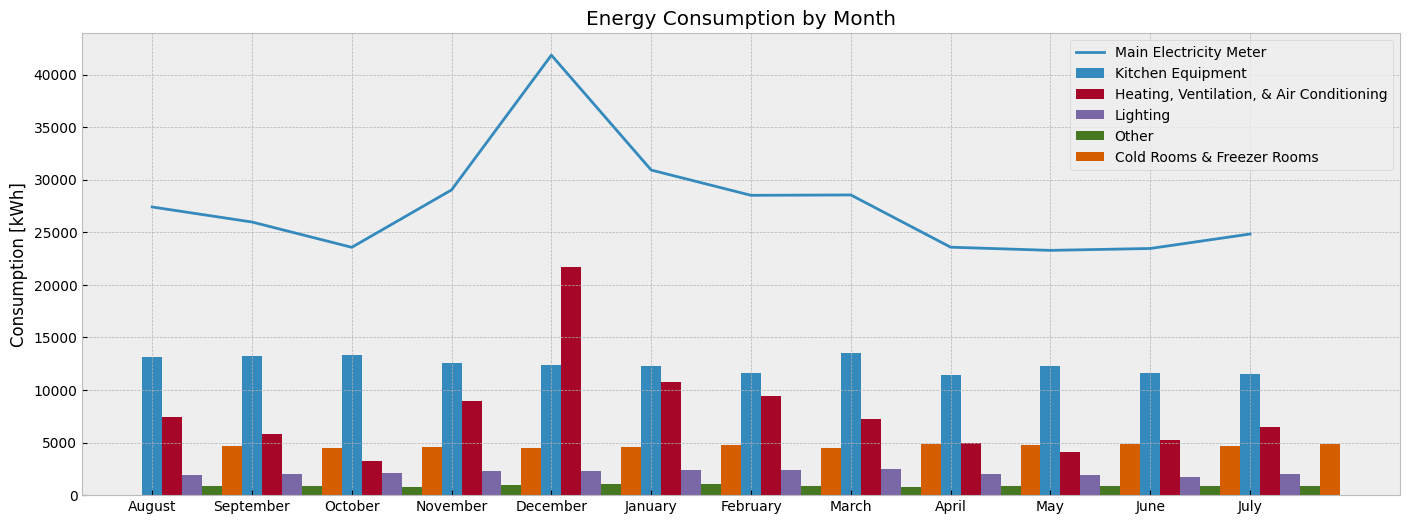

In [20]:
# plotting data

plt.style.use('bmh')
plt.figure(figsize=(17, 6))
plt.title('Energy Consumption by Month')

arange_month = np.arange(len(months))

plt.bar(arange_month, kitchen_equipment, width=0.2, label='Kitchen Equipment')
plt.bar(arange_month + 0.2, HVAC, width=0.2, label='Heating, Ventilation, & Air Conditioning')
plt.bar(arange_month + 0.4, lighting, width=0.2, label='Lighting')
plt.bar(arange_month + 0.6, other, width=0.2, label='Other')
plt.bar(arange_month + 0.8, C_and_F, width=0.2, label='Cold Rooms & Freezer Rooms')
plt.plot(months, main_electricity_meter, label='Main Electricity Meter')

plt.ylabel('Consumption [kWh]')
plt.legend()

##### Generating plot showing that the biggest impact on the total generated electricity cost have kitchen equipment and HVAC System (Heating, Ventilation and Air Conditioning).
##### The restaurant is open from 8 am to 11:00 pm, so kitchen equipment and the HVAC system must only be operational during these hours. One of a source of excessive electricity consumption in the restaurant may be turning on kitchen equipment before working hours.

In [26]:
# checking if the kitchen equipment was not turned on before the start of the working hours
# calculating annual average energy consumption before the start of work 
mean_value_open = df[(df['time'].astype(str) == '07:59:00')]['kitchen_equipment [kWh]'].mean()
print('Annual average energy consumption kitchen equipment before the start of work is', mean_value_open.round(2), 'kWh.')

Annual average energy consumption kitchen equipment before the start of work is 6.79 kWh.


In [27]:
days_with_excessive_consumption = []
excessive_consumption_kWh = []
# comparing dailies power consumption data before the start of work to the annual average
for i in range(0, len(df)+1, 24):
    warnings.filterwarnings("ignore")
    # if daily energy consumption before opening hours bigger than annual it means, that kitchen workers turn on equipment before the start of work
    if (df[i:i+24][(df['time'].astype(str) == '07:59:00')]['kitchen_equipment [kWh]'] > mean_value_open).all():
        # caclulating the amount of excess kWh
        difference_kWh = df[i:i+24][(df['time'].astype(str) == '07:59:00')]['kitchen_equipment [kWh]'] - mean_value_open
        excessive_consumption_kWh.append(difference_kWh)
        # appending days to list with excessive consumption of electricity at the beginning of the first shift
        # so it will help identify workers, whose turn on kitchen equipment before opening the restaurant
        days_with_excessive_consumption.append(df[i:i+24][(df['time'].astype(str) == '07:59:00')]['date'].astype(str))
print(len(days_with_excessive_consumption), 'days with excessive energy consumption at the beginning of the first shift:')
for i in days_with_excessive_consumption:
    print(i.iloc[0])

109 days with excessive energy consumption at the beginning of the first shift:
2022-08-01
2022-08-02
2022-08-03
2022-08-04
2022-08-05
2022-08-06
2022-08-07
2022-08-08
2022-08-09
2022-08-10
2022-08-11
2022-08-12
2022-08-13
2022-08-14
2022-08-15
2022-08-16
2022-08-17
2022-08-18
2022-08-19
2022-08-20
2022-08-21
2022-08-22
2022-08-23
2022-08-24
2022-08-25
2022-08-26
2022-08-27
2022-08-28
2022-08-29
2022-08-30
2022-08-31
2022-09-01
2022-09-02
2022-09-03
2022-09-04
2022-09-05
2022-09-06
2022-09-07
2022-09-08
2022-09-09
2022-09-10
2022-09-11
2022-09-12
2022-09-13
2022-09-14
2022-09-15
2022-09-16
2022-09-19
2022-09-20
2022-09-21
2022-09-22
2022-09-23
2022-09-24
2022-09-25
2022-09-26
2022-09-27
2022-09-28
2022-09-29
2022-10-04
2022-10-10
2022-10-26
2022-11-13
2022-11-16
2022-11-21
2022-11-22
2022-12-01
2022-12-09
2022-12-16
2022-12-18
2022-12-19
2022-12-21
2022-12-23
2023-01-07
2023-01-12
2023-01-22
2023-01-31
2023-02-03
2023-02-15
2023-02-17
2023-02-18
2023-02-21
2023-02-22
2023-03-03
2023-03

In [30]:
# assessing potential excess energy that caused by turning on kitchen equipment before the restaurant's opening hours
sum_excessive_consumption_kWh = 0
for i in excessive_consumption_kWh:
    i = float(i.iloc[0])
    sum_excessive_consumption_kWh += i
print('Potencial excess energy caused by turning on kitchen equipment before the opening hours is', round(sum_excessive_consumption_kWh, 2), 'kWh.')

Potencial excess energy caused by turning on kitchen equipment before the opening hours is 964.61 kWh.


In [31]:
# financial losses incurred due to the early turning on of kitchen equipment 
# https://www.rachuneo.pl/artykuly/wzrost-cen-pradu - the average price of 1 kWh in Poland in 2022 is 0.77 PLN
financial_loss_PLN = round(sum_excessive_consumption_kWh * 0.77, 2)
print(financial_loss_PLN, 'PLN financial loss caused by excessive consumption of electricity at the beginning of the first shift.')

742.75 PLN financial loss caused by excessive consumption of electricity at the beginning of the first shift.


##### Another source of excessive electricity consumption in the restaurant may be leaving kitchen equipment turning on after closing the restaurant.¶

In [32]:
# checking if the kitchen equipment was turned off in the end of the restaurant's opening hours
# calculating annual average energy consumption after the end of work 
mean_value_close = df[(df['time'].astype(str) == '23:59:00')]['kitchen_equipment [kWh]'].mean().round(2)
print('Annual average energy consumption kitchen equipment after the end of work is', mean_value_close, 'kWh.')

Annual average energy consumption kitchen equipment after the end of work is 12.86 kWh.


In [33]:
days_with_excessive_consumption_close = []
excessive_consumption_kWh_close = []
# comparing dailies power consumption data after the end of work to the annual average
for i in range(0, len(df)+1, 24):
    warnings.filterwarnings("ignore")
    # if daily energy consumption after opening hours bigger than annual it means, that kitchen workers leaving kitchen equipment turning on
    # after restaurant's opening hours
    if (df[i:i+24][(df['time'].astype(str) == '23:59:00')]['kitchen_equipment [kWh]'] > mean_value_close).all():
        difference_kWh_close = df[i:i+24][(df['time'].astype(str) == '23:59:00')]['kitchen_equipment [kWh]'] - mean_value_close
        # appending days to list with excessive consumption of electricity at the end of the second shift
        # so it will help identify workers, whose leaving kitchen equipment turning on after opening hours
        excessive_consumption_kWh_close.append(difference_kWh_close)
        days_with_excessive_consumption_close.append(df[i:i+24][(df['time'].astype(str) == '23:59:00')]['date'].astype(str))
print(len(days_with_excessive_consumption_close), 'days with excessive consumption of electricity at the end of the second shift:')
for i in days_with_excessive_consumption_close:
    print(i.iloc[0])

200 days with excessive consumption of electricity at the end of the second shift:
2022-08-01
2022-08-02
2022-08-03
2022-08-04
2022-08-05
2022-08-06
2022-08-07
2022-08-08
2022-08-09
2022-08-10
2022-08-11
2022-08-12
2022-08-13
2022-08-14
2022-08-15
2022-08-16
2022-08-17
2022-08-18
2022-08-19
2022-08-20
2022-08-21
2022-08-23
2022-08-24
2022-08-25
2022-08-26
2022-08-27
2022-08-28
2022-08-29
2022-08-30
2022-08-31
2022-09-01
2022-09-02
2022-09-03
2022-09-04
2022-09-06
2022-09-07
2022-09-08
2022-09-09
2022-09-10
2022-09-11
2022-09-12
2022-09-13
2022-09-15
2022-09-20
2022-09-21
2022-09-22
2022-09-23
2022-09-24
2022-09-25
2022-09-27
2022-09-28
2022-09-30
2022-10-01
2022-10-08
2022-10-10
2022-10-12
2022-10-14
2022-10-20
2022-10-21
2022-10-22
2022-10-29
2022-10-31
2022-11-07
2022-11-09
2022-11-10
2022-11-18
2022-11-25
2022-11-30
2022-12-02
2022-12-03
2022-12-05
2022-12-06
2022-12-07
2022-12-09
2022-12-10
2022-12-12
2022-12-14
2022-12-16
2022-12-19
2022-12-21
2022-12-22
2022-12-27
2022-12-28
2022

In [34]:
# assessing potential excess energy that caused by leaving kitchen equipment turning on after the restaurant's opening hours
sum_excessive_consumption_kWh_close = 0
for i in excessive_consumption_kWh_close:
    i = float(i.iloc[0])
    sum_excessive_consumption_kWh_close += i
print('Potencial excess energy caused by leaving kitchen equipment turning on after opening hours is', round(sum_excessive_consumption_kWh_close, 2), 'kWh.')

Potencial excess energy caused by leaving kitchen equipment turning on after opening hours is 463.1 kWh.


In [35]:
financial_loss_PLN_close = round(sum_excessive_consumption_kWh_close * 0.77, 2)
print(financial_loss_PLN_close, 'PLN financial loss caused by excessive consumption of electricity at the end of the second shift.')

356.59 PLN financial loss caused by excessive consumption of electricity at the end of the second shift.


#####  Another source of excessive electricity consumption in the restaurant may be HVAC system operating beyond restaurant's working hours.

In [36]:
# checking if HVAC system doesn't operating beyound restaurant's the working hours ( from 12 pm to 8 am)
# calculating annual average energy consumption  
sum_hvac_kWh = []
for i in range(0, len(df)+1, 24):
    sum_hvac_kWh.append(df[i:i+24][0:8]['HVAC [kWh]'].sum())
mean_value_hvac = round((sum(sum_hvac_kWh)/len(sum_hvac_kWh)), 2)
print('Annual average HVAC system energy consumption beyound the working hours is', mean_value_hvac, 'kWh.')

Annual average HVAC system energy consumption beyound the working hours is 16.6 kWh.


In [37]:
days_with_excessive_consumption_hvac = []
excessive_consumption_kWh_hvac = []
# comparing daily energy consumption data to the annual average
for i in range(0, len(df)+1, 24):
    warnings.filterwarnings("ignore")
    # if daily energy consumption after opening hours bigger than annual it means, that HVAC system was operating
    # after restaurant's working hours
    if (df[i:i+24][0:8]['HVAC [kWh]'].sum() > mean_value_hvac).all():
        difference_kWh_hvac = df[i:i+24][0:8]['HVAC [kWh]'].sum() - mean_value_hvac  
        # appending days to list with excessive consumption of energy 
        excessive_consumption_kWh_hvac.append(difference_kWh_hvac)
        days_with_excessive_consumption_hvac.append(df[i:i+1]['date'].astype(str))    
print(len(days_with_excessive_consumption_hvac), 'days with excessive HVAC system consumption of electricity beyound the working hours:')
for i in days_with_excessive_consumption_hvac:
    print(i.iloc[0])

68 days with excessive HVAC system consumption of electricity beyound the working hours:
2022-08-06
2022-08-07
2022-08-08
2022-08-09
2022-08-11
2022-08-12
2022-08-13
2022-08-14
2022-08-15
2022-08-16
2022-08-17
2022-08-18
2022-08-19
2022-08-20
2022-08-21
2022-08-22
2022-08-24
2022-08-25
2022-08-26
2022-08-27
2022-08-28
2022-08-30
2022-08-31
2022-09-01
2022-09-02
2022-09-03
2022-09-04
2022-09-05
2022-09-07
2022-09-10
2022-09-11
2022-10-04
2022-10-06
2022-10-10
2022-11-20
2022-11-21
2022-11-22
2022-11-23
2022-11-24
2022-12-01
2022-12-16
2022-12-17
2022-12-18
2022-12-19
2022-12-20
2022-12-21
2022-12-22
2022-12-23
2022-12-24
2022-12-25
2022-12-26
2022-12-27
2022-12-28
2022-12-29
2022-12-30
2022-12-31
2023-01-11
2023-01-29
2023-02-06
2023-02-07
2023-02-08
2023-02-17
2023-03-29
2023-04-03
2023-04-04
2023-04-05
2023-06-21
2023-07-15


In [38]:
# assessing potential excess energy that caused by operating HVAC system after the working hours
sum_excessive_consumption_kWh_hvac = sum(excessive_consumption_kWh_hvac)
print('Potencial excess energy caused by operating HVAC system after the working hours is', round(sum_excessive_consumption_kWh_hvac, 2), 'kWh.')

Potencial excess energy caused by operating HVAC system after the working hours is 3373.67 kWh.


In [39]:
financial_loss_PLN_hvac = round(sum_excessive_consumption_kWh_hvac * 0.77, 2)
print(financial_loss_PLN_hvac, 'PLN financial loss caused by operating HVAC system after the restaurant working hours.')

2597.73 PLN financial loss caused by operating HVAC system after the restaurant working hours.


In [40]:
year_financial_loss = financial_loss_PLN + financial_loss_PLN_close + financial_loss_PLN_hvac
year_financial_loss
print(round(year_financial_loss, 2), 'PLN financial year loss caused by electricity missuse in the restaurant.')

3697.07 PLN financial year loss caused by electricity missuse in the restaurant.
